<a href="https://colab.research.google.com/github/atharva3-c/Object-Tracking/blob/main/experiment_catdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:07<00:00, 265MB/s]
100% 1.06G/1.06G [00:07<00:00, 151MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile(r'/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [5]:
trainn=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)

)

val=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
def normalizee(image,label):
    image=tf.cast(image/255.,tf.float32)
    return image,label

trainn=trainn.map(normalizee)
val=val.map(normalizee)



In [11]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(trainn,epochs=10,validation_data=val)

Epoch 1/10
625/625 [==============================] - 71s 107ms/step - loss: 1.3845 - accuracy: 0.5410 - val_loss: 0.7103 - val_accuracy: 0.5866
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.6321 - accuracy: 0.6442 - val_loss: 0.5556 - val_accuracy: 0.7136
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5534 - accuracy: 0.7134 - val_loss: 0.5568 - val_accuracy: 0.6990
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4929 - accuracy: 0.7613 - val_loss: 0.4977 - val_accuracy: 0.7568
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4261 - accuracy: 0.7994 - val_loss: 0.4595 - val_accuracy: 0.7828
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3668 - accuracy: 0.8338 - val_loss: 0.5767 - val_accuracy: 0.7520
Epoch 7/10
625/625 [==============================] - 63s 100ms/step - loss: 0.3055 - accuracy: 0.8614 - val_loss: 0.4683 - val_ac

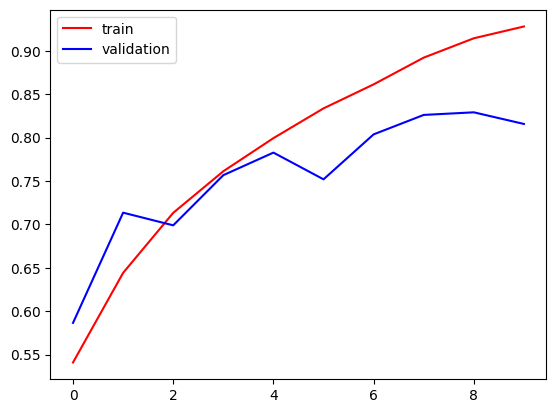

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()